In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Load the dataset
data = pd.read_csv("WineQT.csv")

# View the first few rows
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
data.shape   #Checking Dimension of the dataset

(1143, 13)

In [4]:
data.info() #Collecting details about the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
data.isnull().sum()  #Checking for null values 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [13]:
data.describe() # Basic statistics

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


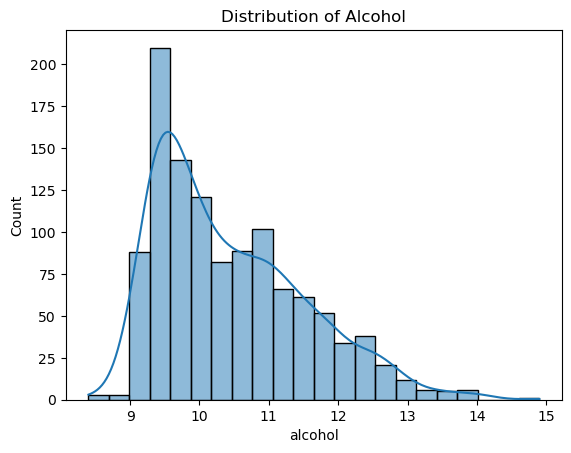

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Check distribution of Alcohol
sns.histplot(data['alcohol'], kde=True)
plt.title('Distribution of Alcohol')
plt.show()

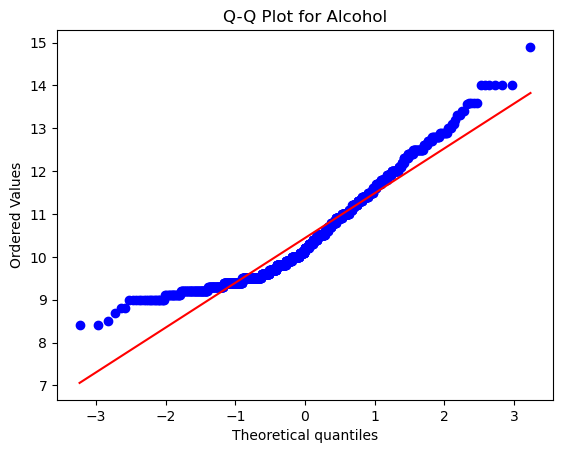

In [15]:
# Q-Q plot for Alcohol
stats.probplot(data['alcohol'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Alcohol')
plt.show()

In [16]:
# Shapiro-Wilk test for Alcohol
shapiro_alcohol = stats.shapiro(data['alcohol'])
print(f'Shapiro-Wilk Test for Alcohol: Statistic={shapiro_alcohol.statistic}, p-value={shapiro_alcohol.pvalue}')

Shapiro-Wilk Test for Alcohol: Statistic=0.9289470480773449, p-value=7.516786703381405e-23


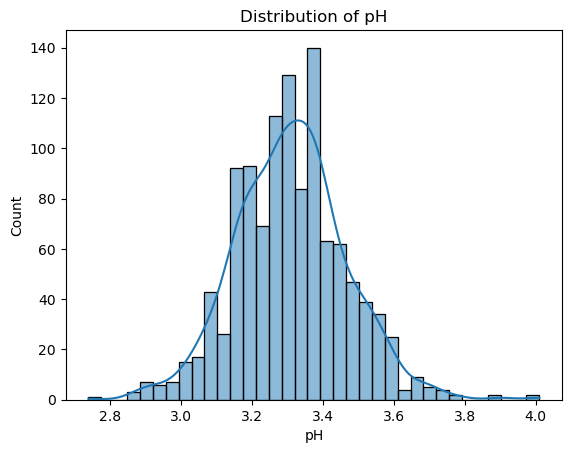

In [17]:
# Check distribution of pH
sns.histplot(data['pH'], kde=True)
plt.title('Distribution of pH')
plt.show()

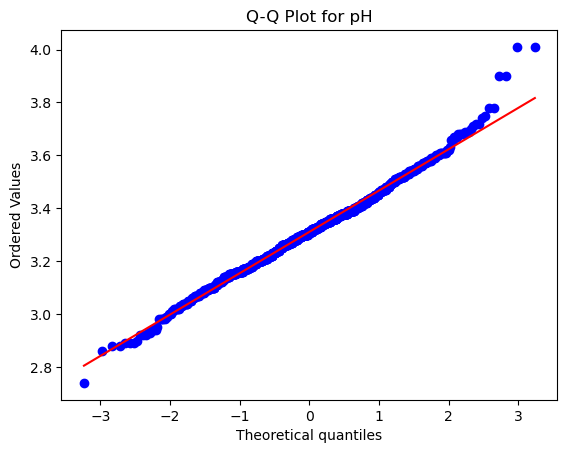

In [18]:
# Q-Q plot for pH
stats.probplot(data['pH'], dist="norm", plot=plt)
plt.title('Q-Q Plot for pH')
plt.show()

In [19]:
# Shapiro-Wilk test for pH
shapiro_ph = stats.shapiro(data['pH'])
print(f'Shapiro-Wilk Test for pH: Statistic={shapiro_ph.statistic}, p-value={shapiro_ph.pvalue}')

Shapiro-Wilk Test for pH: Statistic=0.9921162007107959, p-value=8.67292819515674e-06


In [20]:
# Group data by quality for Alcohol
alcohol_groups = [group['alcohol'].values for name, group in data.groupby('quality') if name in [5, 6, 7]]


In [21]:
# Check normality and decide on the test for Alcohol
if shapiro_alcohol.pvalue > 0.05:
    # One-Way ANOVA for Alcohol
    f_stat, p_value = stats.f_oneway(*alcohol_groups)
    print(f'ANOVA for Alcohol: F-statistic={f_stat}, p-value={p_value}')
else:
    # Kruskal-Wallis H Test for Alcohol
    h_stat, p_value = stats.kruskal(*alcohol_groups)
    print(f'Kruskal-Wallis H Test for Alcohol: H-statistic={h_stat}, p-value={p_value}')

Kruskal-Wallis H Test for Alcohol: H-statistic=284.0973205779734, p-value=2.03727977956863e-62


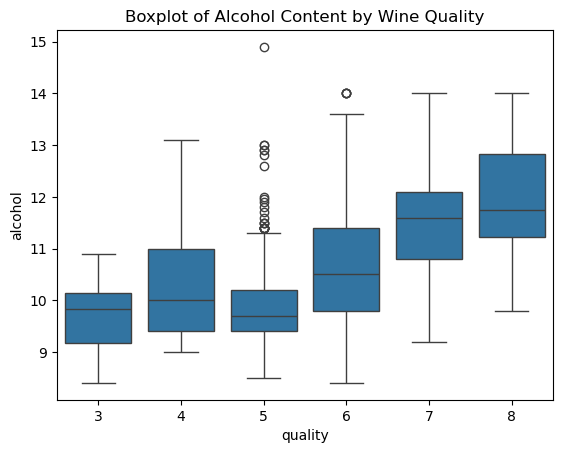

In [22]:
# Boxplot for Alcohol
sns.boxplot(x='quality', y='alcohol', data=data)
plt.title('Boxplot of Alcohol Content by Wine Quality')
plt.show()


In [ ]:
Interpretation of Results:
If the p-value from the ANOVA or Kruskal-Wallis test is less than 0.05, we reject the null hypothesis, indicating that there is a significant difference in alcohol content among wines rated 5, 6, and 7.
If the p-value is greater than 0.05, we fail to reject the null hypothesis, indicating no significant difference